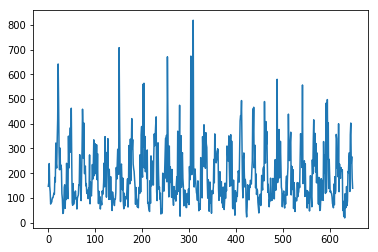

('Var:', 0.37568805)


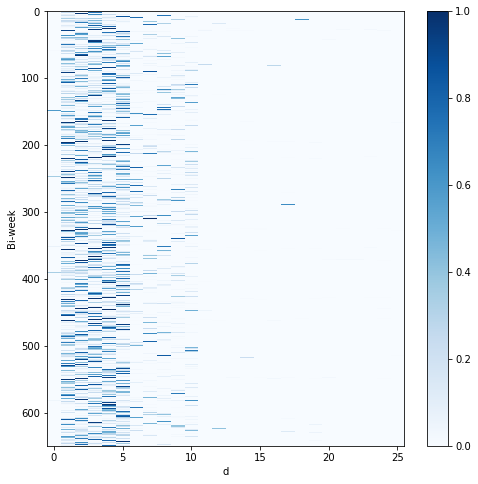

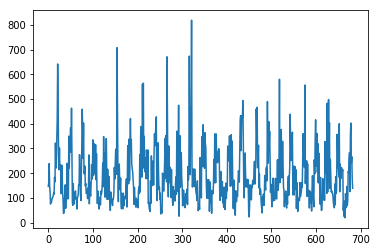

0.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from contextlib import contextmanager
import os
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            

import csv 
import sys

def sim_data(D,r,doPlot):
    os.system("Rscript blrp.R")
    ts = []
    skipFirst = 0
    with open('simData.csv', 'rb') as csvfile:
        for line in csvfile.readlines():
            if skipFirst >= 1:
                ts.append(int(line.split(',')[1]))
            skipFirst += 1
    plt.plot(ts)
    plt.show()
        

    arr_list = ts

    sim_n_t_d = []
    for i in range(len(ts)):

        if np.random.binomial(1,.1) == 1 and i % 26 ==0 and i < len(ts)-10:
            sim_n_t_d.append(np.random.multinomial(ts[i],np.random.dirichlet(np.append([0.01,0.01,0.01,0.01,100],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+1],np.random.dirichlet(np.append([0.01,0.01,0.01,100,.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+2],np.random.dirichlet(np.append([0.01,0.01,100,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+3],np.random.dirichlet(np.append([0.01,100,0.01,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            
            i+=4
        elif np.random.binomial(1,.1) == 1 and i % 11 == 0 and i < len(ts)-10:
            
            sim_n_t_d.append(np.random.multinomial(ts[i],np.random.dirichlet(np.append([0.01,0.01,0.01,0.01,100],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+1],np.random.dirichlet(np.append([0.01,0.01,0.01,100,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+2],np.random.dirichlet(np.append([0.01,0.01,100,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+3],np.random.dirichlet(np.append([0.01,100,0.01,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            i+=4
        elif np.random.binomial(1,.1) == 1 and i % 16 == 0 and i < len(ts)-10 :
            
            sim_n_t_d.append(np.random.multinomial(ts[i],np.random.dirichlet(np.append([0.01,0.01,0.01,0.01,100],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+1],np.random.dirichlet(np.append([0.01,0.01,0.01,100,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+2],np.random.dirichlet(np.append([0.01,0.01,100,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            sim_n_t_d.append(np.random.multinomial(ts[i+3],np.random.dirichlet(np.append([0.01,100,0.01,0.01,0.01],.1*np.ones(D-5))),size=D).tolist()[0])
            i+=4
        else:
            rand_dir = [.005*np.ones(1),.25*np.ones(5),.05*np.ones(5),.001*np.ones(10),.0001*np.ones(D-21)]
            rand_dir =  np.random.dirichlet(np.hstack(rand_dir))
        
            tmp1 = np.random.multinomial(ts[i],rand_dir,size=D).tolist()[0]
            sim_n_t_d.append(tmp1)

    sim_n_t_d = np.array(sim_n_t_d,dtype=np.float32)
    #print (sim_n_t_d)
    p_hat_sim = []
    from matplotlib.pyplot import cm

    for i in range(len(arr_list)):
        #print (sum(sim_n_t_d[i]/np.sum(sim_n_t_d[i])))
        p_hat_sim.append(sim_n_t_d[i]/np.sum(sim_n_t_d[i]))


    if doPlot == True:
        print ("Var:",np.sum(np.var(p_hat_sim,axis=0)))
        plt.figure(figsize=(8,8))
        plt.ylabel("Bi-week")
        plt.xlabel("d")
        plt.imshow(p_hat_sim,aspect='auto',cmap=cm.Blues)
        plt.legend()
        plt.colorbar()
        plt.show()

        plt.plot(sim_n_t_d.sum(axis=1))
        plt.show()

    sim_n_t_d = sim_n_t_d.reshape((-1,D))
    return sim_n_t_d,np.linalg.det(np.cov(p_hat_sim))

sim_data_1,var = sim_data(26,10,True)
print (var)

In [2]:
np.arange(5-1,-1,-1)

array([4, 3, 2, 1, 0])

In [3]:
import numpy as np
import emcee
from scipy.stats import binom
from scipy.stats import norm
import pymc3 as pm
import numpy as np


def bayes_estimate(po_data,m2,phat,LO):
    count = LO
    print (len(po_data),len(m2))
    ret_arr = []
    for row in np.arange(LO,0,-1):
        print (m2[D-row],po_data[D-row],sum(phat[:count]))
        with pm.Model() as model:
            tmp = np.max((m2[(D-row)],po_data[D-row]))
            x = pm.Normal('x', mu=tmp, sd=10)
            z = pm.Binomial('z', n=tmp,p=sum(phat[:count]),observed=po_data[D-row])
        
        with model:
            trace = pm.sample(10000)
            
        ret_arr.append(trace['x'])
        count -=1
    
    return ret_arr

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
def bayes_estimate_prob(po_data,m2,alphas,LO,N_SIM):
    ret_arr = []
    phat = alphas/sum(alphas)
    for s_ in range(N_SIM):
        count = LO
        for row in np.arange(LO,0,-1):
                tmp_n_t_inf = np.max((m2[s_][(D-row)],po_data[D-row]))
                sigma_2_0 = 5
                sigma_2 =   tmp_n_t_inf*sum(phat[:row])*(1-sum(phat[:row]))
                post_mean = (1.*sigma_2_0/(sigma_2_0+sigma_2))*po_data[D-row] \
                          +(1.*sigma_2/(sigma_2_0+sigma_2))*tmp_n_t_inf
                post_var = 1./(1./sigma_2_0 + 1./sigma_2)
                
                

                ret_arr.append(np.random.normal(post_mean, 25*np.sqrt(post_var),size=100))
                count -=1
    
    return ret_arr

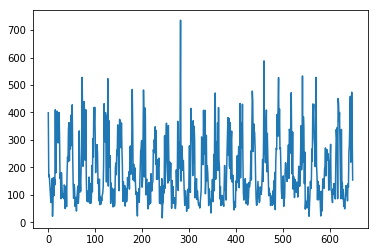

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[96768.65392101805, 19264.674186831995, 22838.64380773202]
(array([39., 40.]), array([ 25., 402.]), array([ -4., 406.]), 219.0)
(array([162., 164.]), array([ 31., 398.]), array([ -3., 403.]), 294.0)
(array([873., 886.]), array([ -9., 398.]), array([ -2., 402.]), 474.0)
(array([820., 840.]), array([  1., 367.]), array([ -3., 407.]), 334.0)
(array([0., 0.]), array([-47., 352.]), array([ -3., 406.]), 154.0)
(0.0, 0.8, 0.8)


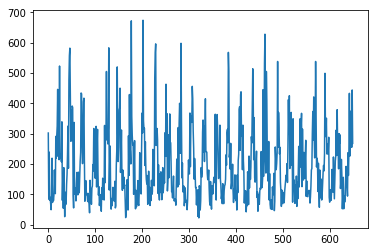

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[42568.66632832802, 4209.493940925999, 7222.208550687559]
(array([437., 440.]), array([156., 503.]), array([ 24., 524.]), 338.0)
(array([121., 122.]), array([152., 528.]), array([ 24., 519.]), 320.0)
(array([18., 18.]), array([111., 524.]), array([ 25., 518.]), 255.0)
(array([253., 258.]), array([115., 524.]), array([ 25., 522.]), 444.0)
(array([0., 0.]), array([110., 500.]), array([ 24., 521.]), 268.0)
(0.0, 1.0, 1.0)


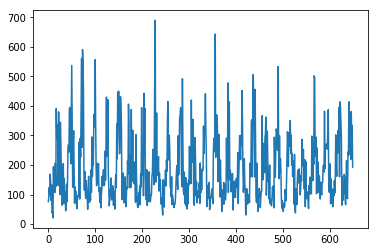

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[42267.51461115, 40780.883939478, 34171.01802298274]
(array([111., 111.]), array([-97., 342.]), array([-10., 308.]), 219.0)
(array([105., 105.]), array([-121.,  251.]), array([-13., 311.]), 381.0)
(array([559., 567.]), array([-73., 307.]), array([-12., 311.]), 292.0)
(array([442., 452.]), array([-83., 266.]), array([-12., 308.]), 334.0)
(array([0., 0.]), array([-119.,  284.]), array([-12., 311.]), 193.0)
(0.0, 0.6, 0.6)


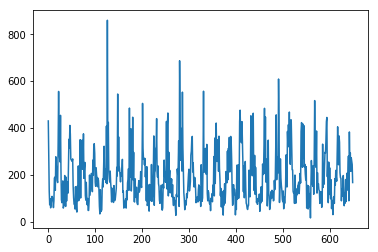

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[28659.767725, 5007.501233507998, 7792.602884669835]
(array([216., 218.]), array([ 38., 401.]), array([-10., 380.]), 215.0)
(array([384., 388.]), array([ -1., 352.]), array([-11., 378.]), 273.0)
(array([49., 50.]), array([-42., 368.]), array([-11., 382.]), 257.0)
(array([0., 0.]), array([-46., 390.]), array([-11., 385.]), 244.0)
(array([0., 0.]), array([-61., 355.]), array([-11., 384.]), 167.0)
(0.0, 1.0, 1.0)


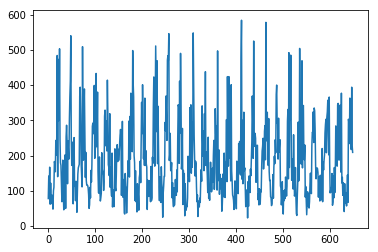

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[28421.87650125202, 5459.218444053995, 6724.296256297103]
(array([171., 172.]), array([118., 455.]), array([ -0., 447.]), 244.0)
(array([69., 69.]), array([ 72., 469.]), array([  0., 453.]), 217.0)
(array([652., 663.]), array([ 91., 408.]), array([  1., 453.]), 394.0)
(array([186., 190.]), array([ 98., 443.]), array([  0., 452.]), 227.0)
(array([0., 0.]), array([ 83., 430.]), array([  0., 451.]), 209.0)
(0.0, 1.0, 1.0)


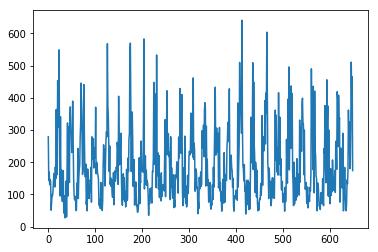

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[771080.7340323775, 59777.90799251002, 31743.687163318555]
(array([383., 386.]), array([ 10., 379.]), array([ -5., 450.]), 307.0)
(array([502., 507.]), array([-52., 342.]), array([ -5., 449.]), 511.0)
(array([717., 728.]), array([-53., 339.]), array([ -5., 453.]), 392.0)
(array([2362., 2423.]), array([  2., 369.]), array([ -5., 453.]), 466.0)
(array([0., 0.]), array([-71., 295.]), array([ -5., 452.]), 174.0)
(0.0, 0.4, 0.6)


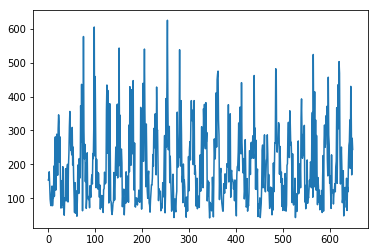

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[59105.88919347597, 23660.723709684007, 25357.274049946744]
(array([56., 57.]), array([-27., 318.]), array([-10., 377.]), 430.0)
(array([559., 564.]), array([ 18., 340.]), array([-10., 376.]), 347.0)
(array([325., 329.]), array([-22., 365.]), array([-11., 375.]), 169.0)
(array([117., 119.]), array([ 14., 329.]), array([-10., 374.]), 277.0)
(array([0., 0.]), array([-22., 312.]), array([-10., 377.]), 244.0)
(0.0, 0.6, 0.8)


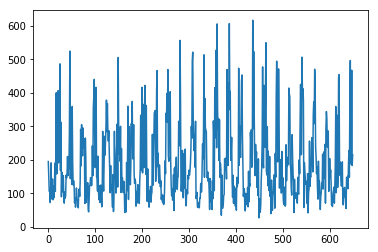

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[53422.66103535199, 22695.381676323992, 12459.417700416367]
(array([257., 259.]), array([180., 551.]), array([  7., 567.]), 188.0)
(array([282., 285.]), array([201., 568.]), array([  7., 564.]), 225.0)
(array([28., 28.]), array([104., 584.]), array([  6., 565.]), 467.0)
(array([41., 42.]), array([120., 545.]), array([  6., 569.]), 183.0)
(array([0., 0.]), array([102., 509.]), array([  6., 566.]), 215.0)
(0.0, 1.0, 1.0)


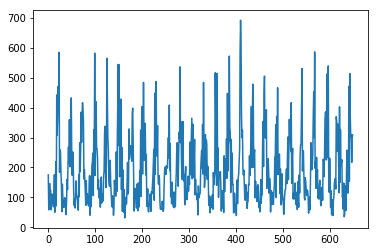

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[48769.38182696201, 15466.284845407985, 2635.929361005606]
(array([419., 422.]), array([276., 663.]), array([ 24., 625.]), 303.0)
(array([309., 313.]), array([181., 583.]), array([ 22., 633.]), 310.0)
(array([6., 6.]), array([191., 615.]), array([ 25., 626.]), 217.0)
(array([0., 0.]), array([170., 577.]), array([ 22., 629.]), 300.0)
(array([0., 0.]), array([227., 560.]), array([ 24., 631.]), 309.0)
(0.2, 1.0, 1.0)


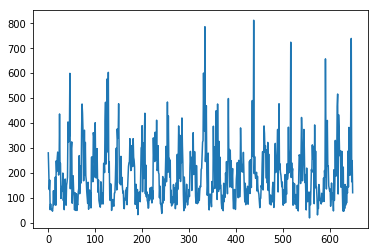

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[62302.808052418, 83297.378321104, 61133.48045314788]
(array([477., 480.]), array([-108.,  403.]), array([-12., 687.]), 447.0)
(array([1245., 1259.]), array([ -9., 383.]), array([-14., 687.]), 739.0)
(array([66., 67.]), array([-54., 331.]), array([-13., 684.]), 164.0)
(array([ 98., 101.]), array([-37., 371.]), array([-12., 684.]), 249.0)
(array([0., 0.]), array([-100.,  311.]), array([-12., 690.]), 120.0)
(0.0, 0.6, 0.8)


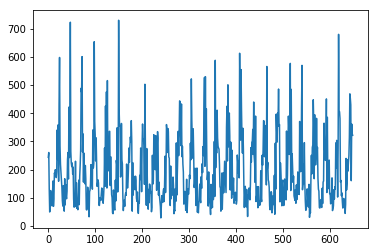

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[101287.08512630194, 13899.903746714006, 7909.3164396993625]
(array([407., 409.]), array([211., 587.]), array([ 32., 609.]), 430.0)
(array([186., 188.]), array([208., 611.]), array([ 32., 601.]), 161.0)
(array([922., 935.]), array([177., 573.]), array([ 32., 604.]), 362.0)
(array([44., 45.]), array([142., 567.]), array([ 32., 606.]), 328.0)
(array([0., 0.]), array([159., 545.]), array([ 35., 606.]), 322.0)
(0.0, 0.8, 1.0)


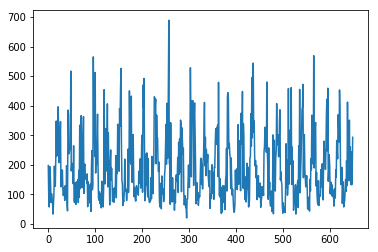

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[45726.66734146802, 5167.552620039994, 4393.801067130693]
(array([47., 47.]), array([ 26., 411.]), array([ -4., 425.]), 133.0)
(array([475., 480.]), array([ 63., 434.]), array([ -5., 423.]), 244.0)
(array([368., 374.]), array([ 44., 409.]), array([ -4., 421.]), 132.0)
(array([0., 0.]), array([ 38., 377.]), array([ -6., 424.]), 153.0)
(array([0., 0.]), array([  2., 392.]), array([ -4., 424.]), 293.0)
(0.0, 1.0, 1.0)


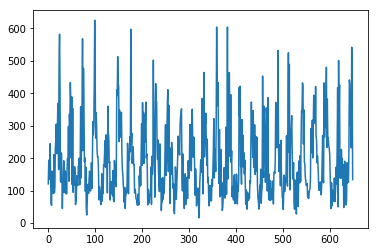

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[38487.98946140201, 21507.196696863997, 26543.36568777167]
(array([30., 31.]), array([182., 564.]), array([ 19., 527.]), 367.0)
(array([377., 381.]), array([157., 519.]), array([ 18., 533.]), 232.0)
(array([373., 378.]), array([157., 528.]), array([ 17., 532.]), 542.0)
(array([317., 323.]), array([118., 494.]), array([ 19., 528.]), 429.0)
(array([0., 0.]), array([126., 498.]), array([ 18., 527.]), 134.0)
(0.0, 0.8, 0.8)


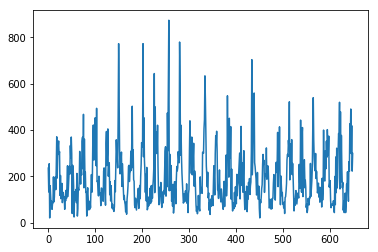

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[76773.05923271002, 38410.501201543986, 34127.6321691672]
(array([493., 497.]), array([ 20., 389.]), array([-12., 414.]), 491.0)
(array([581., 586.]), array([-54., 345.]), array([-12., 409.]), 299.0)
(array([11., 11.]), array([-33., 349.]), array([-12., 413.]), 419.0)
(array([5., 5.]), array([ -9., 326.]), array([-12., 414.]), 223.0)
(array([0., 0.]), array([-19., 348.]), array([-12., 413.]), 299.0)
(0.0, 0.6, 0.6)


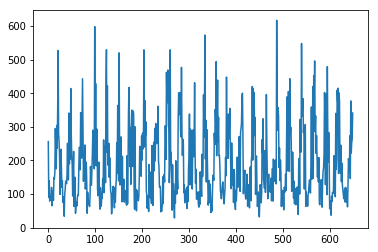

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[67295.82423031601, 34145.44912722199, 36340.11895521141]
(array([16., 16.]), array([-41., 335.]), array([-21., 311.]), 377.0)
(array([330., 333.]), array([-74., 325.]), array([-21., 314.]), 222.0)
(array([75., 76.]), array([-49., 298.]), array([-21., 312.]), 254.0)
(array([47., 48.]), array([-83., 271.]), array([-21., 313.]), 262.0)
(array([0., 0.]), array([-96., 250.]), array([-23., 308.]), 341.0)
(0.0, 0.6, 0.6)


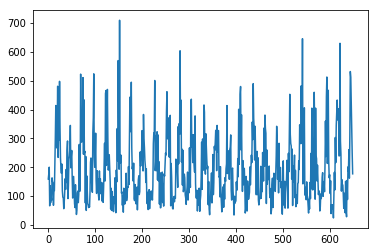

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[33837.52572352798, 30156.61019220601, 17507.08689130546]
(array([369., 371.]), array([288., 698.]), array([ 50., 678.]), 512.0)
(array([652., 659.]), array([339., 717.]), array([ 49., 680.]), 419.0)
(array([301., 306.]), array([310., 614.]), array([ 47., 683.]), 306.0)
(array([0., 0.]), array([292., 653.]), array([ 49., 678.]), 249.0)
(array([0., 0.]), array([233., 613.]), array([ 50., 680.]), 177.0)
(0.2, 0.4, 1.0)


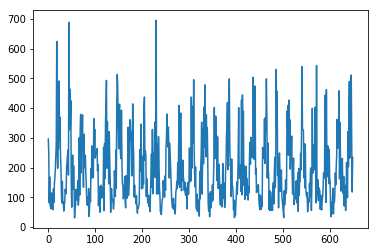

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[108514.81534196404, 19693.466649449976, 20710.790808913218]
(array([597., 602.]), array([105., 557.]), array([ 41., 595.]), 434.0)
(array([889., 899.]), array([233., 639.]), array([ 44., 593.]), 511.0)
(array([705., 718.]), array([169., 548.]), array([ 41., 593.]), 284.0)
(array([473., 486.]), array([175., 573.]), array([ 42., 593.]), 118.0)
(array([0., 0.]), array([136., 538.]), array([ 41., 594.]), 234.0)
(0.0, 0.8, 1.0)


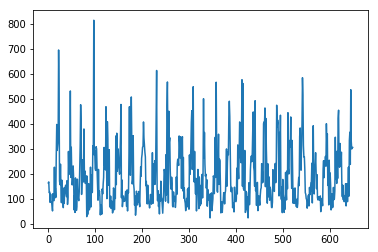

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[41154.61866607203, 11228.038096662009, 18611.254552999224]
(array([707., 713.]), array([110., 522.]), array([  0., 546.]), 536.0)
(array([122., 124.]), array([ 67., 510.]), array([  1., 547.]), 330.0)
(array([117., 120.]), array([ 57., 483.]), array([  0., 544.]), 299.0)
(array([383., 394.]), array([ 80., 500.]), array([  1., 547.]), 304.0)
(array([0., 0.]), array([ 85., 429.]), array([  1., 545.]), 305.0)
(0.0, 0.8, 1.0)


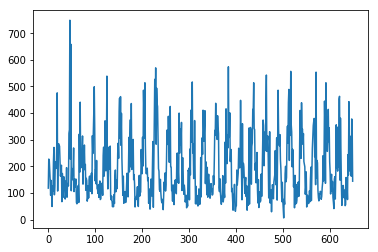

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[92397.70361130797, 10804.11360267, 13594.483749933566]
(array([441., 444.]), array([ 48., 422.]), array([ -8., 426.]), 313.0)
(array([13., 14.]), array([ 45., 370.]), array([ -8., 427.]), 163.0)
(array([904., 918.]), array([ 22., 393.]), array([ -7., 428.]), 378.0)
(array([0., 0.]), array([ 11., 367.]), array([ -8., 427.]), 344.0)
(array([0., 0.]), array([ 15., 339.]), array([ -8., 430.]), 144.0)
(0.0, 1.0, 1.0)


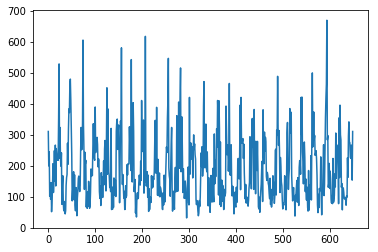

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[55352.41202279399, 3789.5996031240006, 3025.4911715472117]
(array([321., 323.]), array([ 89., 450.]), array([  0., 450.]), 223.0)
(array([509., 513.]), array([ 90., 448.]), array([  0., 447.]), 266.0)
(array([541., 546.]), array([ 97., 400.]), array([  0., 447.]), 245.0)
(array([5., 6.]), array([ 32., 442.]), array([  0., 447.]), 153.0)
(array([0., 0.]), array([ -5., 388.]), array([  0., 445.]), 310.0)
(0.0, 1.0, 1.0)


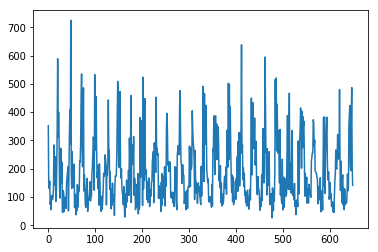

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[95520.32130798002, 20321.64787153001, 24131.00426477398]
(array([162., 163.]), array([ 53., 488.]), array([ -4., 430.]), 193.0)
(array([180., 182.]), array([ 51., 360.]), array([ -5., 432.]), 372.0)
(array([574., 582.]), array([ 41., 452.]), array([ -3., 431.]), 487.0)
(array([840., 861.]), array([ 53., 370.]), array([ -4., 432.]), 209.0)
(array([0., 0.]), array([ 39., 388.]), array([ -3., 433.]), 141.0)
(0.0, 0.6, 0.8)


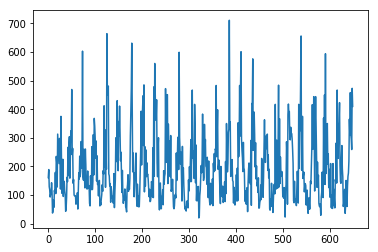

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[115387.83919818801, 15083.166221355985, 6314.939978628547]
(array([341., 343.]), array([170., 645.]), array([ 12., 639.]), 312.0)
(array([38., 38.]), array([275., 639.]), array([ 10., 633.]), 296.0)
(array([598., 607.]), array([249., 622.]), array([ 13., 636.]), 259.0)
(array([0., 0.]), array([216., 612.]), array([ 13., 636.]), 473.0)
(array([0., 0.]), array([181., 630.]), array([ 11., 633.]), 410.0)
(0.0, 1.0, 1.0)


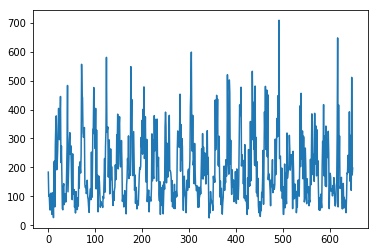

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[52663.08695151401, 30707.91170528599, 35704.336559410185]
(array([218., 219.]), array([-77., 347.]), array([-12., 352.]), 311.0)
(array([210., 212.]), array([  1., 337.]), array([-10., 352.]), 121.0)
(array([89., 91.]), array([-11., 318.]), array([-12., 347.]), 511.0)
(array([0., 0.]), array([-14., 318.]), array([-13., 347.]), 174.0)
(array([0., 0.]), array([-72., 329.]), array([-10., 347.]), 198.0)
(0.0, 0.8, 0.8)


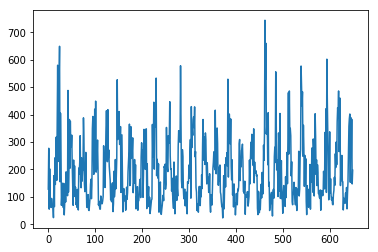

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[19828.556617214024, 22718.920203237998, 20963.437251747913]
(array([566., 570.]), array([ 47., 418.]), array([-12., 450.]), 389.0)
(array([293., 296.]), array([-91., 317.]), array([-11., 453.]), 245.0)
(array([261., 264.]), array([-31., 362.]), array([-11., 452.]), 383.0)
(array([40., 41.]), array([-97., 275.]), array([-12., 453.]), 147.0)
(array([0., 0.]), array([-61., 292.]), array([-11., 451.]), 197.0)
(0.0, 0.8, 1.0)


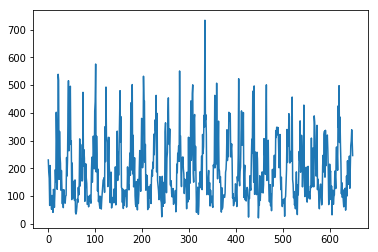

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[63941.93992284402, 16202.106397835993, 13075.452093591632]
(array([382., 385.]), array([-50., 390.]), array([ -7., 384.]), 282.0)
(array([264., 267.]), array([ 36., 357.]), array([ -7., 381.]), 298.0)
(array([767., 778.]), array([-67., 342.]), array([ -8., 382.]), 339.0)
(array([52., 54.]), array([ 10., 349.]), array([ -7., 381.]), 298.0)
(array([0., 0.]), array([-33., 291.]), array([ -6., 382.]), 246.0)
(0.0, 1.0, 1.0)


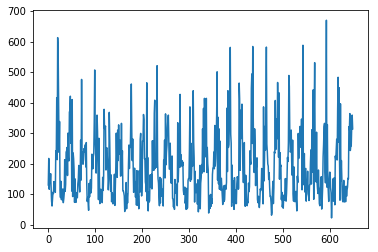

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[116033.77655766191, 5530.191975077997, 4712.4645960652215]
(array([290., 292.]), array([160., 529.]), array([  3., 506.]), 259.0)
(array([405., 409.]), array([ 56., 509.]), array([  2., 500.]), 258.0)
(array([897., 909.]), array([119., 447.]), array([  2., 502.]), 323.0)
(array([11., 12.]), array([ 48., 438.]), array([  3., 505.]), 359.0)
(array([0., 0.]), array([ 61., 456.]), array([  1., 503.]), 314.0)
(0.0, 1.0, 1.0)


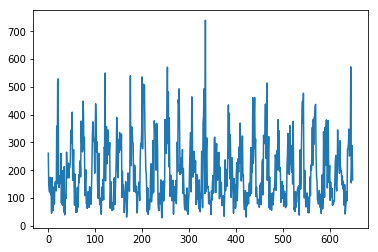

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[22560.148896339997, 26864.53948565, 28529.923954050657]
(array([597., 601.]), array([ 64., 433.]), array([ -6., 479.]), 572.0)
(array([155., 156.]), array([ 61., 449.]), array([ -6., 484.]), 154.0)
(array([243., 246.]), array([  9., 419.]), array([ -6., 483.]), 208.0)
(array([0., 0.]), array([-12., 389.]), array([ -5., 477.]), 289.0)
(array([0., 0.]), array([ 13., 378.]), array([ -6., 482.]), 165.0)
(0.0, 0.8, 0.8)


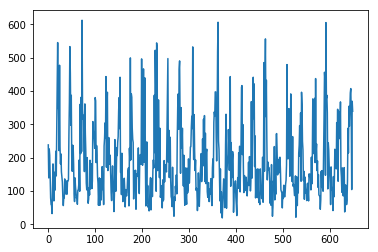

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[58107.609053604014, 18242.84815432599, 22061.331275412762]
(array([351., 354.]), array([ 90., 454.]), array([ -5., 432.]), 407.0)
(array([582., 589.]), array([ -7., 393.]), array([ -4., 432.]), 326.0)
(array([0., 0.]), array([ 37., 412.]), array([ -4., 430.]), 104.0)
(array([61., 62.]), array([ 28., 381.]), array([ -5., 429.]), 369.0)
(array([0., 0.]), array([-20., 378.]), array([ -4., 427.]), 339.0)
(0.0, 1.0, 1.0)


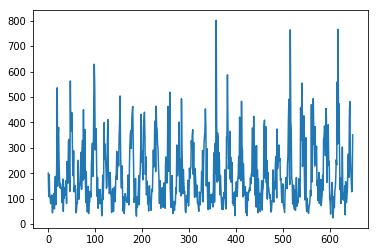

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[30292.304036227997, 9394.722000077998, 9026.760214544218]
(array([120., 121.]), array([ 48., 474.]), array([-12., 419.]), 217.0)
(array([175., 177.]), array([-11., 318.]), array([-13., 415.]), 171.0)
(array([43., 43.]), array([-40., 358.]), array([-13., 415.]), 127.0)
(array([23., 23.]), array([-35., 330.]), array([-12., 415.]), 132.0)
(array([0., 0.]), array([-19., 323.]), array([-12., 420.]), 351.0)
(0.0, 0.8, 1.0)


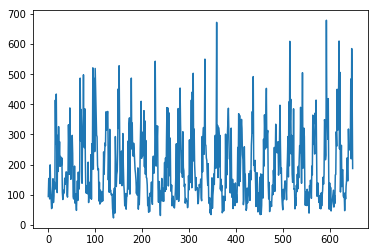

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[67351.179584676, 64741.27686067, 76132.71798646197]
(array([378., 380.]), array([ 23., 362.]), array([-10., 374.]), 484.0)
(array([134., 135.]), array([-29., 317.]), array([ -9., 366.]), 219.0)
(array([115., 116.]), array([ -6., 347.]), array([-11., 365.]), 585.0)
(array([163., 166.]), array([-11., 331.]), array([-10., 366.]), 416.0)
(array([0., 0.]), array([-13., 330.]), array([ -9., 369.]), 187.0)
(0.0, 0.4, 0.4)


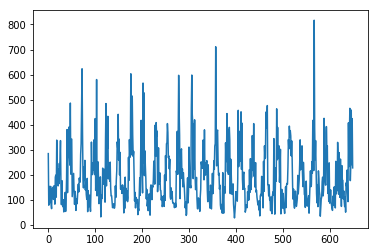

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[46664.301335281954, 22689.863555156, 17608.82406528983]
(array([308., 310.]), array([ 94., 602.]), array([ -3., 499.]), 237.0)
(array([784., 793.]), array([ 28., 376.]), array([ -4., 503.]), 458.0)
(array([0., 0.]), array([ 68., 444.]), array([ -5., 506.]), 240.0)
(array([322., 328.]), array([ 16., 411.]), array([ -4., 504.]), 424.0)
(array([0., 0.]), array([ 26., 399.]), array([ -3., 501.]), 227.0)
(0.0, 0.6, 1.0)


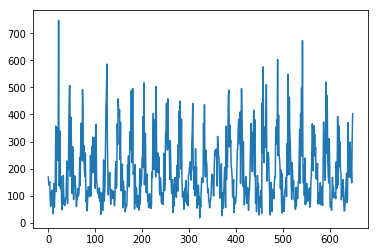

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[126566.93026425406, 13451.336722590006, 13882.375504047344]
(array([171., 172.]), array([-45., 394.]), array([ -4., 421.]), 166.0)
(array([349., 353.]), array([ 46., 464.]), array([ -4., 419.]), 198.0)
(array([346., 351.]), array([-45., 382.]), array([ -4., 422.]), 148.0)
(array([938., 961.]), array([ 33., 413.]), array([ -4., 424.]), 311.0)
(array([0., 0.]), array([  2., 361.]), array([ -4., 424.]), 403.0)
(0.0, 0.8, 1.0)


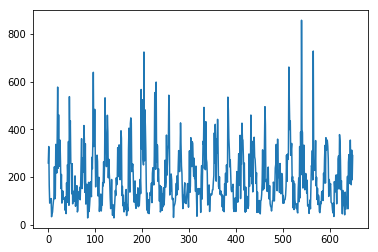

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[41651.421212556, 8286.317311550005, 9451.798851040972]
(array([300., 302.]), array([ -2., 404.]), array([ -9., 405.]), 248.0)
(array([247., 249.]), array([ 53., 416.]), array([ -8., 401.]), 168.0)
(array([31., 32.]), array([  2., 405.]), array([-10., 400.]), 313.0)
(array([0., 0.]), array([-22., 419.]), array([-11., 403.]), 189.0)
(array([0., 0.]), array([  7., 368.]), array([ -9., 400.]), 290.0)
(0.0, 1.0, 1.0)


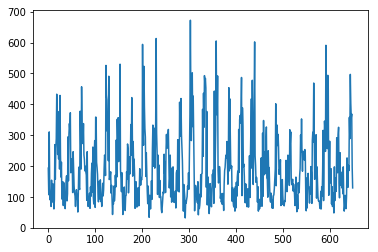

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[12202.784295204005, 37257.54735507802, 19670.363929721832]
(array([378., 380.]), array([257., 617.]), array([ 51., 659.]), 403.0)
(array([355., 358.]), array([282., 678.]), array([ 50., 659.]), 357.0)
(array([199., 202.]), array([289., 647.]), array([ 53., 660.]), 369.0)
(array([317., 324.]), array([262., 633.]), array([ 50., 663.]), 197.0)
(array([0., 0.]), array([250., 608.]), array([ 51., 662.]), 130.0)
(0.2, 0.6, 1.0)


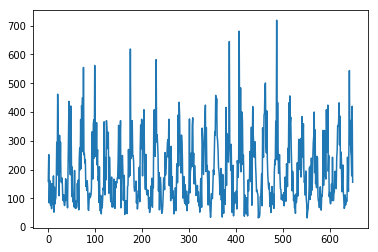

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[34339.63799872399, 22798.960727733986, 10654.909805295414]
(array([372., 375.]), array([223., 540.]), array([ 15., 543.]), 262.0)
(array([412., 416.]), array([257., 545.]), array([ 17., 546.]), 246.0)
(array([0., 0.]), array([163., 539.]), array([ 17., 542.]), 178.0)
(array([686., 700.]), array([150., 512.]), array([ 16., 542.]), 420.0)
(array([0., 0.]), array([161., 562.]), array([ 17., 545.]), 156.0)
(0.0, 0.6, 1.0)


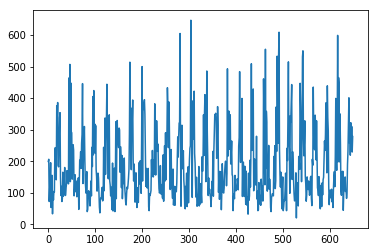

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[34124.108055793986, 10195.224785268005, 8976.981191507864]
(array([450., 453.]), array([-16., 395.]), array([-10., 415.]), 322.0)
(array([294., 297.]), array([ -6., 386.]), array([-10., 411.]), 231.0)
(array([464., 470.]), array([-11., 363.]), array([ -9., 411.]), 310.0)
(array([10., 10.]), array([-20., 342.]), array([-10., 409.]), 229.0)
(array([0., 0.]), array([-12., 380.]), array([ -9., 411.]), 278.0)
(0.0, 1.0, 1.0)


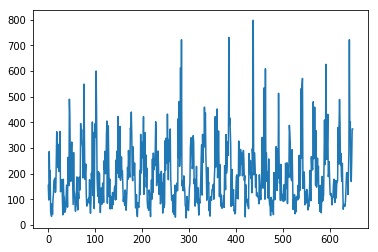

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[62985.729316636, 24467.78812858198, 8788.819179032842]
(array([278., 280.]), array([242., 635.]), array([ 11., 597.]), 198.0)
(array([284., 287.]), array([231., 583.]), array([ 14., 594.]), 169.0)
(array([32., 32.]), array([207., 555.]), array([ 12., 599.]), 256.0)
(array([50., 51.]), array([160., 551.]), array([ 13., 594.]), 374.0)
(array([0., 0.]), array([135., 579.]), array([ 14., 595.]), 374.0)
(0.0, 0.6, 1.0)


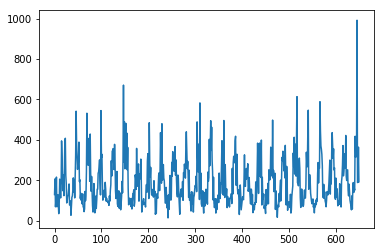

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[45885.90229792199, 91080.64839466801, 96173.20508712754]
(array([1155., 1162.]), array([230., 566.]), array([ 25., 889.]), 992.0)
(array([122., 123.]), array([196., 555.]), array([ 22., 887.]), 189.0)
(array([0., 0.]), array([183., 542.]), array([ 24., 889.]), 191.0)
(array([12., 13.]), array([188., 512.]), array([ 22., 887.]), 364.0)
(array([0., 0.]), array([161., 513.]), array([ 23., 887.]), 193.0)
(0.0, 0.6, 0.8)


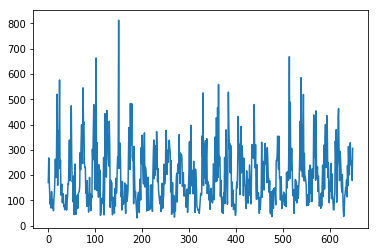

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[43005.212998131996, 9885.856859623987, 2488.648435162547]
(array([201., 203.]), array([152., 565.]), array([ 16., 546.]), 261.0)
(array([293., 296.]), array([182., 558.]), array([ 18., 546.]), 239.0)
(array([557., 565.]), array([122., 555.]), array([ 18., 547.]), 257.0)
(array([28., 28.]), array([163., 510.]), array([ 18., 546.]), 179.0)
(array([0., 0.]), array([168., 527.]), array([ 18., 541.]), 306.0)
(0.0, 1.0, 1.0)


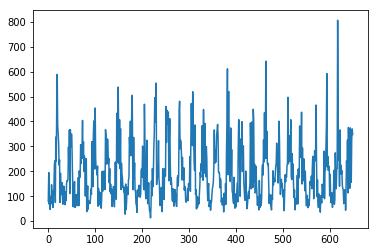

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[34312.169369658, 28357.069723022007, 31636.48410267179]
(array([179., 180.]), array([-48., 324.]), array([-10., 340.]), 234.0)
(array([150., 152.]), array([-32., 349.]), array([ -9., 337.]), 156.0)
(array([260., 263.]), array([-44., 308.]), array([ -9., 339.]), 326.0)
(array([160., 163.]), array([-47., 318.]), array([-10., 335.]), 370.0)
(array([0., 0.]), array([-44., 292.]), array([-10., 336.]), 348.0)
(0.0, 0.4, 0.6)


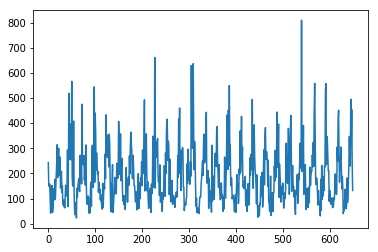

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[45128.669976138, 45253.23903074798, 38572.16616572368]
(array([519., 523.]), array([  1., 367.]), array([-12., 435.]), 495.0)
(array([481., 486.]), array([  4., 354.]), array([-10., 437.]), 322.0)
(array([27., 28.]), array([-72., 319.]), array([-11., 436.]), 453.0)
(array([266., 272.]), array([-16., 337.]), array([-10., 436.]), 242.0)
(array([0., 0.]), array([ -2., 345.]), array([-11., 432.]), 132.0)
(0.0, 0.6, 0.6)


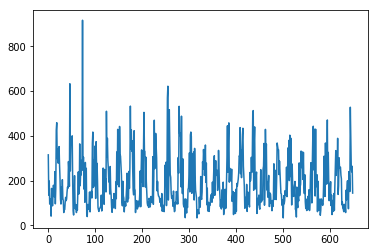

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[277653.0422599463, 10317.248120949997, 7839.698577192057]
(array([91., 91.]), array([ 46., 437.]), array([  2., 498.]), 405.0)
(array([107., 108.]), array([154., 571.]), array([  2., 498.]), 261.0)
(array([66., 67.]), array([ 83., 450.]), array([  2., 498.]), 239.0)
(array([1352., 1380.]), array([126., 463.]), array([  1., 501.]), 264.0)
(array([0., 0.]), array([ 89., 401.]), array([  1., 502.]), 144.0)
(0.0, 1.0, 1.0)


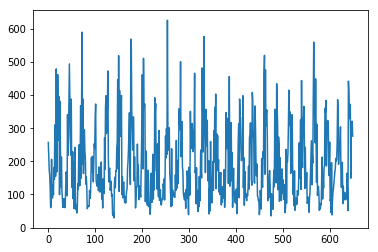

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[89252.26510298593, 15084.019104190022, 5047.6455751903995]
(array([165., 166.]), array([150., 571.]), array([ 21., 565.]), 149.0)
(array([350., 353.]), array([240., 573.]), array([ 21., 566.]), 292.0)
(array([0., 0.]), array([155., 560.]), array([ 21., 568.]), 320.0)
(array([826., 845.]), array([196., 529.]), array([ 21., 567.]), 321.0)
(array([0., 0.]), array([163., 537.]), array([ 20., 566.]), 276.0)
(0.0, 0.8, 1.0)


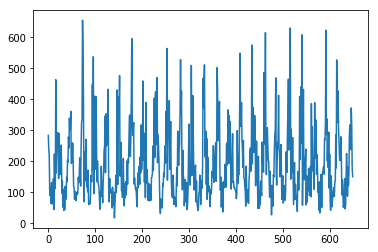

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[39879.840964082, 6709.449263050001, 8051.072212616271]
(array([362., 365.]), array([ 90., 464.]), array([  5., 454.]), 246.0)
(array([319., 322.]), array([ 37., 428.]), array([  4., 453.]), 372.0)
(array([676., 686.]), array([ 54., 426.]), array([  5., 452.]), 317.0)
(array([11., 11.]), array([ 61., 442.]), array([  4., 454.]), 179.0)
(array([0., 0.]), array([ 64., 362.]), array([  4., 452.]), 150.0)
(0.0, 1.0, 1.0)


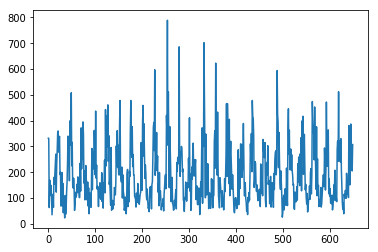

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[69086.519984434, 46704.794778188, 51146.0057847108]
(array([38., 38.]), array([-54., 261.]), array([-35., 262.]), 387.0)
(array([49., 50.]), array([-125.,  265.]), array([-34., 269.]), 323.0)
(array([30., 31.]), array([-98., 264.]), array([-37., 265.]), 219.0)
(array([66., 67.]), array([-62., 249.]), array([-35., 267.]), 205.0)
(array([0., 0.]), array([-82., 265.]), array([-36., 265.]), 307.0)
(0.0, 0.4, 0.4)


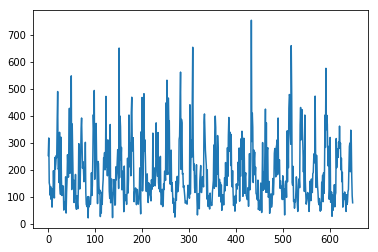

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[9098.845111356, 10188.838056396004, 12231.420772269257]
(array([405., 409.]), array([ 26., 414.]), array([ -7., 429.]), 347.0)
(array([354., 357.]), array([  5., 438.]), array([ -7., 431.]), 318.0)
(array([14., 15.]), array([ 18., 422.]), array([ -7., 431.]), 178.0)
(array([16., 17.]), array([ 12., 404.]), array([ -8., 427.]), 104.0)
(array([0., 0.]), array([ -1., 375.]), array([ -7., 432.]), 78.0)
(0.0, 1.0, 1.0)


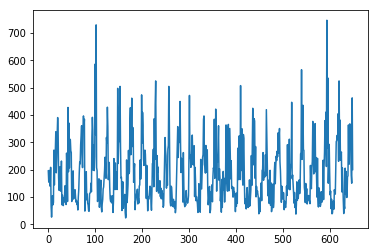

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[703639.0515141163, 23683.239578706, 14788.876643094341]
(array([128., 129.]), array([218., 534.]), array([  8., 544.]), 270.0)
(array([225., 227.]), array([195., 547.]), array([  7., 543.]), 179.0)
(array([283., 287.]), array([143., 543.]), array([  8., 546.]), 151.0)
(array([2292., 2339.]), array([120., 522.]), array([  8., 543.]), 463.0)
(array([0., 0.]), array([169., 499.]), array([  9., 548.]), 201.0)
(0.0, 0.8, 1.0)


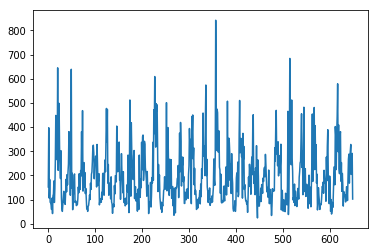

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[13294.490243796003, 6382.685576131992, 6146.342249027769]
(array([363., 366.]), array([ 76., 504.]), array([  6., 476.]), 328.0)
(array([315., 318.]), array([ 86., 440.]), array([  7., 478.]), 204.0)
(array([209., 213.]), array([ 47., 483.]), array([  4., 476.]), 231.0)
(array([86., 88.]), array([ 46., 452.]), array([  7., 478.]), 291.0)
(array([0., 0.]), array([ 30., 399.]), array([  7., 482.]), 102.0)
(0.0, 1.0, 1.0)


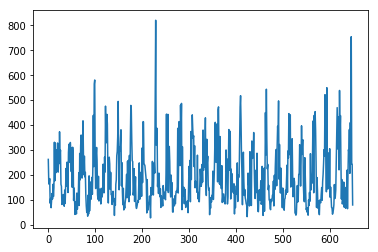

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[36799.672998411996, 44894.633436008, 55489.28307617244]
(array([114., 115.]), array([ 92., 537.]), array([ 14., 536.]), 243.0)
(array([488., 493.]), array([131., 602.]), array([ 13., 541.]), 755.0)
(array([65., 66.]), array([144., 517.]), array([ 13., 541.]), 247.0)
(array([0., 0.]), array([103., 484.]), array([ 13., 538.]), 242.0)
(array([0., 0.]), array([135., 467.]), array([ 13., 539.]), 79.0)
(0.0, 0.6, 0.8)


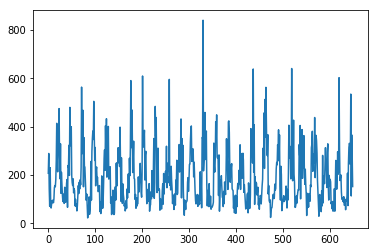

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[23893.097066878006, 21983.73717576, 27866.94317825213]
(array([566., 570.]), array([122., 489.]), array([ -4., 476.]), 535.0)
(array([2., 2.]), array([ 85., 432.]), array([ -5., 476.]), 113.0)
(array([223., 226.]), array([ 68., 416.]), array([ -5., 471.]), 366.0)
(array([31., 32.]), array([ 35., 388.]), array([ -5., 472.]), 282.0)
(array([0., 0.]), array([ 51., 441.]), array([ -5., 472.]), 152.0)
(0.0, 0.8, 0.8)


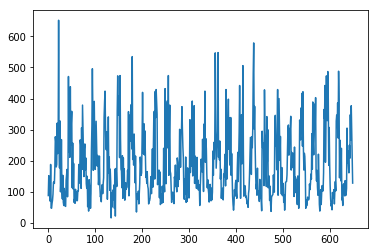

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[27838.067175207998, 5487.098520902005, 8922.761011693587]
(array([383., 386.]), array([123., 434.]), array([  0., 444.]), 266.0)
(array([146., 148.]), array([ 96., 425.]), array([  0., 446.]), 377.0)
(array([142., 144.]), array([ 83., 444.]), array([  0., 449.]), 292.0)
(array([16., 17.]), array([ 71., 448.]), array([  0., 450.]), 200.0)
(array([0., 0.]), array([ 41., 390.]), array([  0., 450.]), 128.0)
(0.0, 1.0, 1.0)


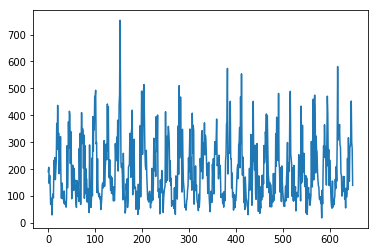

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[40673.109561414, 10389.892571356006, 17280.82972195997]
(array([428., 431.]), array([ 72., 400.]), array([ -4., 445.]), 301.0)
(array([319., 322.]), array([ 76., 431.]), array([ -3., 445.]), 453.0)
(array([29., 29.]), array([ 74., 455.]), array([ -3., 441.]), 299.0)
(array([0., 0.]), array([ 52., 439.]), array([ -3., 439.]), 277.0)
(array([0., 0.]), array([ 49., 391.]), array([ -4., 443.]), 140.0)
(0.0, 0.8, 0.8)


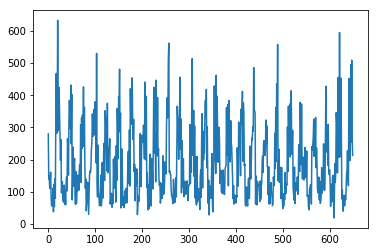

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[91322.14108390005, 73710.783186954, 34886.9815693881]
(array([690., 695.]), array([-48., 340.]), array([ -5., 534.]), 495.0)
(array([374., 379.]), array([-79., 309.]), array([ -5., 535.]), 255.0)
(array([563., 571.]), array([-81., 311.]), array([ -5., 540.]), 509.0)
(array([849., 868.]), array([-90., 258.]), array([ -5., 538.]), 263.0)
(array([0., 0.]), array([-129.,  317.]), array([ -5., 537.]), 213.0)
(0.0, 0.4, 1.0)


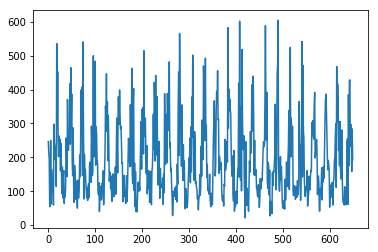

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[176930.57298854194, 23643.209778342, 10410.968049935549]
(array([415., 418.]), array([-71., 315.]), array([-12., 348.]), 277.0)
(array([365., 369.]), array([-68., 282.]), array([-12., 350.]), 296.0)
(array([79., 80.]), array([-89., 254.]), array([-11., 350.]), 158.0)
(array([1174., 1202.]), array([-68., 304.]), array([-10., 352.]), 284.0)
(array([0., 0.]), array([-85., 258.]), array([-12., 344.]), 193.0)
(0.0, 0.8, 1.0)


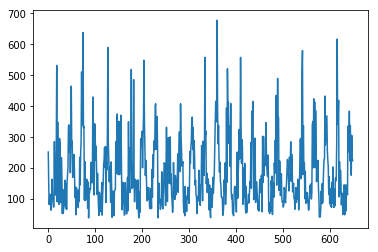

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[32836.152088388, 3182.4845096820018, 3673.8149000739477]
(array([126., 127.]), array([ 62., 451.]), array([ -4., 462.]), 265.0)
(array([221., 224.]), array([130., 452.]), array([ -4., 456.]), 177.0)
(array([12., 12.]), array([ 74., 483.]), array([ -4., 457.]), 306.0)
(array([156., 159.]), array([ 86., 452.]), array([ -4., 458.]), 235.0)
(array([0., 0.]), array([ 31., 391.]), array([ -4., 454.]), 224.0)
(0.0, 1.0, 1.0)


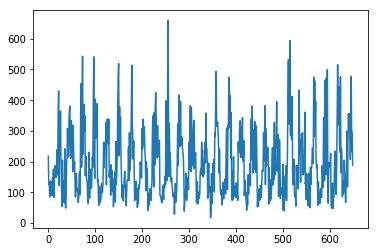

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[49647.98527130001, 16840.095466302017, 20582.841071545077]
(array([362., 365.]), array([ 78., 432.]), array([ -6., 414.]), 261.0)
(array([378., 381.]), array([ 65., 392.]), array([ -5., 415.]), 478.0)
(array([3., 3.]), array([ 25., 399.]), array([ -6., 415.]), 233.0)
(array([662., 676.]), array([ 59., 381.]), array([ -7., 419.]), 296.0)
(array([0., 0.]), array([ 16., 330.]), array([ -6., 411.]), 188.0)
(0.0, 0.8, 0.8)


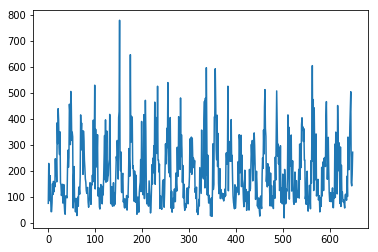

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[65102.93632131601, 14775.282304494005, 19065.995788333123]
(array([42., 43.]), array([159., 515.]), array([  2., 481.]), 504.0)
(array([209., 211.]), array([122., 479.]), array([  2., 484.]), 155.0)
(array([126., 128.]), array([106., 465.]), array([  1., 483.]), 143.0)
(array([0., 0.]), array([ 89., 412.]), array([  2., 482.]), 188.0)
(array([0., 0.]), array([106., 422.]), array([  1., 483.]), 272.0)
(0.0, 1.0, 0.8)


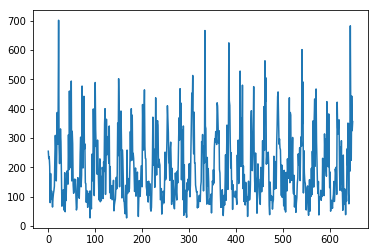

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[479202.6361937636, 46903.34011523596, 12226.472800260888]
(array([489., 493.]), array([226., 659.]), array([ 26., 762.]), 360.0)
(array([6., 6.]), array([441., 812.]), array([ 26., 761.]), 224.0)
(array([773., 784.]), array([277., 681.]), array([ 26., 758.]), 443.0)
(array([1753., 1790.]), array([342., 740.]), array([ 25., 762.]), 325.0)
(array([0., 0.]), array([302., 699.]), array([ 25., 761.]), 356.0)
(0.0, 0.6, 1.0)


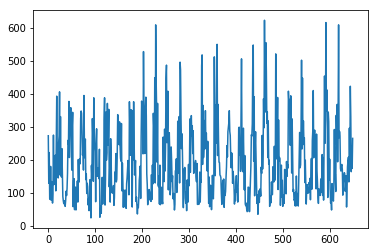

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[157268.62030883, 20095.297447313995, 7332.348232975889]
(array([213., 214.]), array([174., 531.]), array([ 36., 567.]), 331.0)
(array([297., 300.]), array([216., 606.]), array([ 37., 566.]), 164.0)
(array([564., 572.]), array([147., 570.]), array([ 36., 565.]), 242.0)
(array([924., 945.]), array([173., 497.]), array([ 37., 565.]), 174.0)
(array([0., 0.]), array([165., 512.]), array([ 34., 563.]), 265.0)
(0.0, 0.8, 1.0)


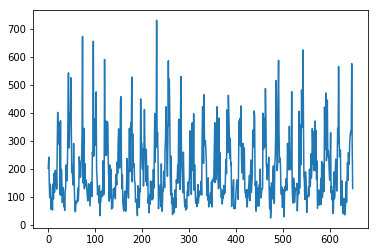

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[159610.7696587258, 19206.834664543996, 21761.543926260685]
(array([217., 218.]), array([170., 563.]), array([  9., 555.]), 335.0)
(array([525., 531.]), array([108., 524.]), array([  9., 551.]), 322.0)
(array([1377., 1396.]), array([114., 479.]), array([ 10., 553.]), 575.0)
(array([34., 34.]), array([ 65., 461.]), array([  8., 552.]), 288.0)
(array([0., 0.]), array([ 36., 441.]), array([  8., 555.]), 129.0)
(0.0, 0.8, 0.8)


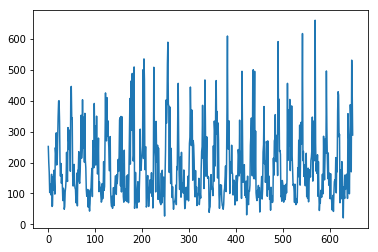

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[64523.562668620005, 19664.907290082007, 22664.20877177028]
(array([112., 113.]), array([204., 532.]), array([  5., 537.]), 342.0)
(array([122., 123.]), array([197., 546.]), array([  4., 541.]), 170.0)
(array([121., 123.]), array([168., 513.]), array([  4., 538.]), 531.0)
(array([301., 308.]), array([150., 499.]), array([  4., 536.]), 434.0)
(array([0., 0.]), array([ 99., 444.]), array([  4., 538.]), 289.0)
(0.0, 0.6, 1.0)


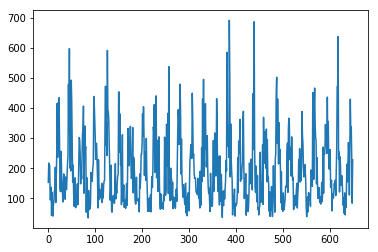

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[26426.46659240401, 33695.633029740005, 18725.91789778199]
(array([188., 189.]), array([213., 616.]), array([ 64., 612.]), 322.0)
(array([468., 473.]), array([232., 596.]), array([ 66., 607.]), 338.0)
(array([430., 438.]), array([249., 598.]), array([ 62., 612.]), 240.0)
(array([0., 0.]), array([217., 565.]), array([ 63., 611.]), 84.0)
(array([0., 0.]), array([183., 573.]), array([ 67., 612.]), 228.0)
(0.0, 0.6, 1.0)


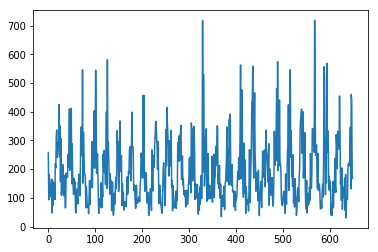

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[174355.50337186776, 18776.83200613, 20622.739179431665]
(array([190., 191.]), array([134., 500.]), array([ -0., 523.]), 131.0)
(array([845., 853.]), array([177., 497.]), array([ -1., 526.]), 460.0)
(array([1156., 1171.]), array([130., 481.]), array([ -0., 526.]), 440.0)
(array([579., 589.]), array([ 73., 476.]), array([ -0., 520.]), 178.0)
(array([0., 0.]), array([ 49., 537.]), array([  0., 522.]), 168.0)
(0.0, 0.8, 1.0)


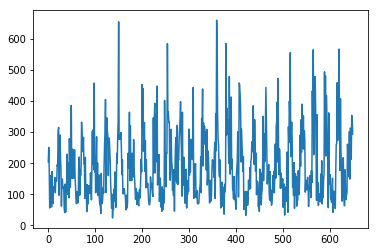

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[25743.228101851997, 9355.726932157999, 16115.89467878323]
(array([181., 182.]), array([ 31., 388.]), array([ -4., 427.]), 310.0)
(array([163., 165.]), array([ 91., 475.]), array([ -4., 424.]), 213.0)
(array([235., 239.]), array([ 27., 393.]), array([ -6., 426.]), 354.0)
(array([243., 249.]), array([ 36., 424.]), array([ -4., 429.]), 344.0)
(array([0., 0.]), array([ 62., 426.]), array([ -5., 426.]), 294.0)
(0.0, 1.0, 1.0)


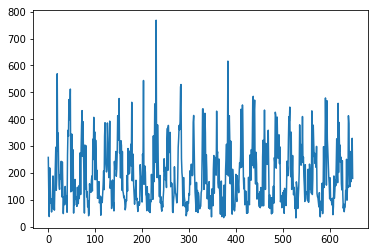

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[37498.234684999996, 23633.692518319996, 17839.356709085238]
(array([233., 234.]), array([-53., 298.]), array([-21., 281.]), 167.0)
(array([295., 298.]), array([-96., 261.]), array([-21., 283.]), 216.0)
(array([44., 45.]), array([-115.,  245.]), array([-22., 281.]), 234.0)
(array([0., 0.]), array([-105.,  247.]), array([-22., 286.]), 329.0)
(array([0., 0.]), array([-101.,  219.]), array([-21., 283.]), 180.0)
(0.0, 0.8, 0.8)


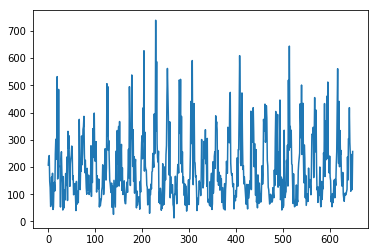

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[33332.261379164, 10443.459049962, 4012.098664240635]
(array([71., 72.]), array([115., 478.]), array([ -4., 464.]), 111.0)
(array([4., 4.]), array([ 51., 453.]), array([ -4., 462.]), 208.0)
(array([37., 37.]), array([ 41., 431.]), array([ -3., 461.]), 246.0)
(array([0., 0.]), array([ 75., 445.]), array([ -3., 459.]), 117.0)
(array([0., 0.]), array([ 71., 390.]), array([ -3., 462.]), 257.0)
(0.0, 0.8, 1.0)


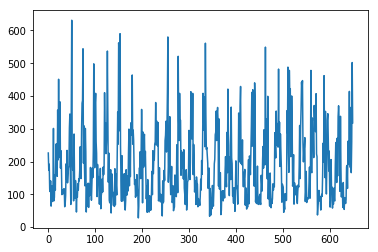

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[82739.68290742999, 36874.238196422004, 35831.851431366966]
(array([505., 508.]), array([-15., 391.]), array([-13., 419.]), 365.0)
(array([47., 47.]), array([-14., 352.]), array([-14., 417.]), 166.0)
(array([97., 98.]), array([-12., 333.]), array([-13., 417.]), 260.0)
(array([0., 0.]), array([-33., 370.]), array([-12., 417.]), 502.0)
(array([0., 0.]), array([-44., 345.]), array([-13., 419.]), 318.0)
(0.0, 0.8, 0.8)


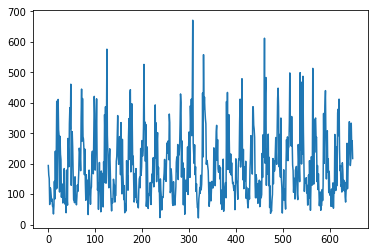

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[53017.02477501201, 12178.23023258, 17696.66118094282]
(array([225., 227.]), array([ 20., 367.]), array([-15., 350.]), 211.0)
(array([6., 6.]), array([-22., 360.]), array([-15., 355.]), 333.0)
(array([0., 0.]), array([ -5., 322.]), array([-15., 347.]), 256.0)
(array([483., 492.]), array([-22., 307.]), array([-14., 349.]), 275.0)
(array([0., 0.]), array([-18., 302.]), array([-14., 350.]), 217.0)
(0.0, 1.0, 1.0)


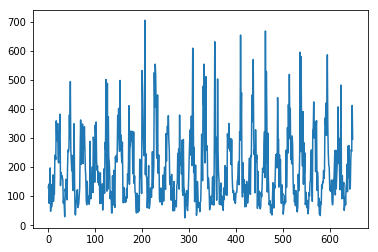

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[52398.655992509994, 32105.46419019801, 27511.791948143953]
(array([211., 212.]), array([-96., 315.]), array([-16., 342.]), 226.0)
(array([481., 486.]), array([-34., 359.]), array([-16., 349.]), 260.0)
(array([124., 125.]), array([-65., 290.]), array([-18., 347.]), 254.0)
(array([83., 85.]), array([-88., 299.]), array([-15., 348.]), 412.0)
(array([0., 0.]), array([-53., 314.]), array([-13., 346.]), 296.0)
(0.0, 0.8, 0.8)


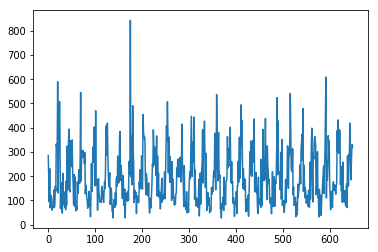

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[63409.49610054799, 6797.728161300004, 9481.103641159483]
(array([11., 11.]), array([121., 474.]), array([ -4., 449.]), 185.0)
(array([335., 339.]), array([100., 462.]), array([ -5., 454.]), 235.0)
(array([41., 42.]), array([ 28., 440.]), array([ -5., 456.]), 302.0)
(array([6., 6.]), array([ 36., 411.]), array([ -5., 452.]), 331.0)
(array([0., 0.]), array([ 36., 431.]), array([ -5., 453.]), 321.0)
(0.0, 1.0, 1.0)


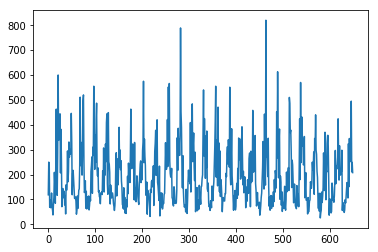

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[13735.606128524005, 8668.522009326005, 14287.464030726502]
(array([291., 293.]), array([ 58., 508.]), array([ -3., 511.]), 269.0)
(array([412., 416.]), array([130., 560.]), array([ -2., 511.]), 495.0)
(array([280., 284.]), array([105., 502.]), array([ -2., 510.]), 211.0)
(array([133., 135.]), array([ 80., 448.]), array([ -1., 509.]), 249.0)
(array([0., 0.]), array([ 16., 477.]), array([ -2., 511.]), 208.0)
(0.0, 1.0, 1.0)


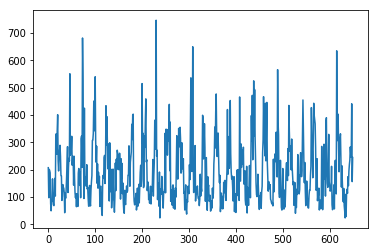

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[23175488.121666394, 8144.039900614002, 12043.471226214597]
(array([41., 41.]), array([113., 480.]), array([ 21., 457.]), 257.0)
(array([25., 25.]), array([118., 462.]), array([ 21., 461.]), 245.0)
(array([517., 524.]), array([ 82., 473.]), array([ 19., 459.]), 441.0)
(array([0., 0.]), array([ 72., 418.]), array([ 20., 461.]), 156.0)
(array([ 9804., 12096.]), array([ 91., 395.]), array([ 20., 462.]), 244.0)
(0.0, 1.0, 1.0)


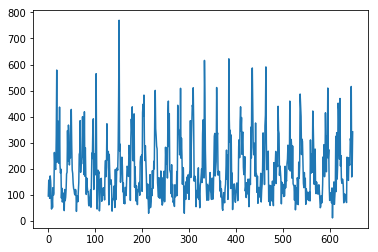

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[196468.42090483595, 15691.772388022011, 17368.97669140838]
(array([114., 114.]), array([ 83., 512.]), array([ -2., 511.]), 305.0)
(array([836., 843.]), array([ 98., 449.]), array([ -2., 512.]), 516.0)
(array([135., 136.]), array([ 96., 482.]), array([ -3., 510.]), 169.0)
(array([1046., 1066.]), array([129., 414.]), array([ -2., 507.]), 205.0)
(array([0., 0.]), array([ 70., 454.]), array([ -1., 512.]), 342.0)
(0.0, 0.8, 0.8)


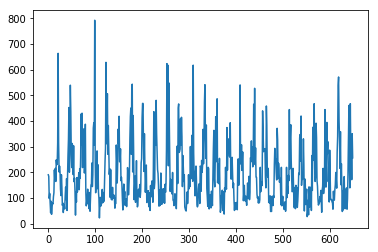

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[38979.42142554802, 16846.183926867998, 5389.982689006656]
(array([374., 376.]), array([234., 585.]), array([ 25., 604.]), 272.0)
(array([185., 187.]), array([220., 684.]), array([ 26., 601.]), 286.0)
(array([372., 376.]), array([172., 552.]), array([ 25., 597.]), 171.0)
(array([89., 91.]), array([112., 587.]), array([ 25., 600.]), 350.0)
(array([0., 0.]), array([167., 501.]), array([ 26., 604.]), 256.0)
(0.0, 0.8, 1.0)


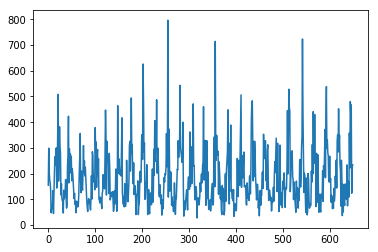

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[33901.482488978, 24337.216052182008, 17663.53830944382]
(array([468., 472.]), array([194., 609.]), array([ 23., 597.]), 423.0)
(array([159., 161.]), array([262., 623.]), array([ 22., 598.]), 467.0)
(array([0., 0.]), array([206., 612.]), array([ 22., 595.]), 124.0)
(array([168., 172.]), array([232., 550.]), array([ 21., 599.]), 222.0)
(array([0., 0.]), array([198., 550.]), array([ 22., 600.]), 234.0)
(0.0, 0.6, 1.0)


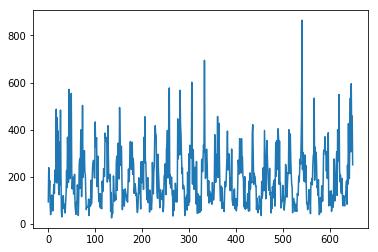

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[82874.23541232201, 10851.947656350003, 18000.996461121136]
(array([428., 431.]), array([243., 618.]), array([ 15., 620.]), 306.0)
(array([870., 877.]), array([262., 626.]), array([ 14., 627.]), 595.0)
(array([0., 0.]), array([172., 618.]), array([ 13., 623.]), 366.0)
(array([104., 106.]), array([181., 581.]), array([ 14., 623.]), 458.0)
(array([0., 0.]), array([245., 550.]), array([ 14., 625.]), 251.0)
(0.0, 1.0, 1.0)


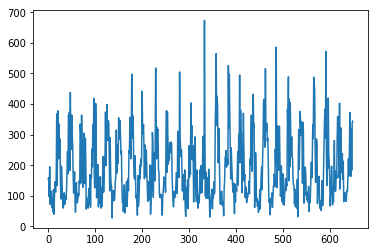

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[275926.9785032979, 10610.368885833996, 7502.379210536009]
(array([152., 153.]), array([135., 500.]), array([ 10., 477.]), 164.0)
(array([175., 177.]), array([ 34., 408.]), array([ 11., 473.]), 319.0)
(array([403., 410.]), array([ 50., 451.]), array([ 11., 476.]), 184.0)
(array([1411., 1444.]), array([ 31., 450.]), array([  9., 472.]), 338.0)
(array([0., 0.]), array([ 61., 419.]), array([ 10., 474.]), 344.0)
(0.0, 1.0, 1.0)


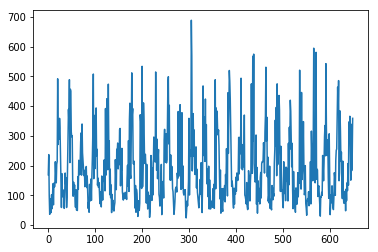

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[38686.491113644, 10791.738268397996, 8042.0877545897265]
(array([219., 220.]), array([114., 544.]), array([ -4., 497.]), 151.0)
(array([370., 373.]), array([ 54., 447.]), array([ -4., 499.]), 339.0)
(array([82., 84.]), array([ 51., 485.]), array([ -3., 495.]), 183.0)
(array([0., 0.]), array([ 42., 429.]), array([ -3., 496.]), 221.0)
(array([0., 0.]), array([ 21., 488.]), array([ -4., 495.]), 359.0)
(0.0, 1.0, 1.0)


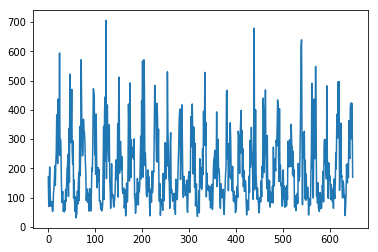

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[138733.55001190808, 6925.070520428004, 11270.426911145234]
(array([465., 469.]), array([208., 573.]), array([ -1., 569.]), 423.0)
(array([421., 425.]), array([194., 567.]), array([ -1., 569.]), 301.0)
(array([17., 18.]), array([174., 573.]), array([ -1., 568.]), 423.0)
(array([1050., 1078.]), array([155., 548.]), array([ -2., 566.]), 367.0)
(array([0., 0.]), array([106., 535.]), array([ -0., 569.]), 170.0)
(0.0, 1.0, 1.0)


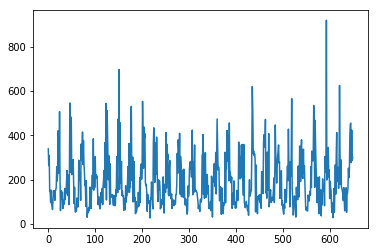

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[78291.707675932, 6331.062315739997, 5759.338059135907]
(array([424., 427.]), array([273., 626.]), array([ 18., 639.]), 455.0)
(array([518., 524.]), array([217., 646.]), array([ 18., 636.]), 277.0)
(array([9., 9.]), array([211., 659.]), array([ 17., 640.]), 424.0)
(array([27., 28.]), array([175., 587.]), array([ 17., 637.]), 287.0)
(array([0., 0.]), array([182., 590.]), array([ 18., 639.]), 302.0)
(0.0, 1.0, 1.0)


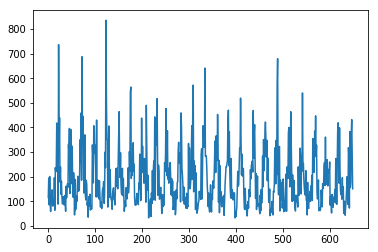

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[33565.78941311799, 20881.641529821998, 23359.046683972494]
(array([244., 246.]), array([ 30., 419.]), array([ -8., 413.]), 178.0)
(array([460., 465.]), array([ -9., 413.]), array([ -7., 410.]), 371.0)
(array([146., 148.]), array([ 15., 364.]), array([ -8., 411.]), 432.0)
(array([63., 65.]), array([-19., 383.]), array([ -8., 414.]), 290.0)
(array([0., 0.]), array([ -5., 337.]), array([ -8., 409.]), 151.0)
(0.0, 0.8, 0.8)


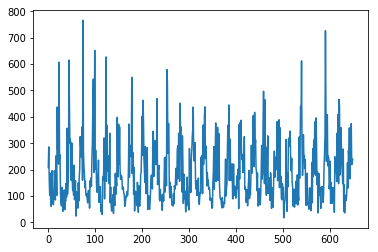

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[49210.873310049974, 5935.593732047996, 9846.42008665929]
(array([116., 117.]), array([ -1., 374.]), array([ -7., 431.]), 296.0)
(array([636., 642.]), array([ 49., 418.]), array([ -7., 437.]), 374.0)
(array([405., 410.]), array([-14., 384.]), array([ -7., 436.]), 219.0)
(array([0., 0.]), array([ 18., 384.]), array([ -7., 434.]), 226.0)
(array([0., 0.]), array([-29., 383.]), array([ -7., 435.]), 239.0)
(0.0, 1.0, 1.0)


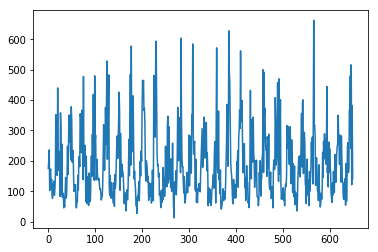

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[51169.56733404198, 29770.052628200017, 23799.926155662768]
(array([248., 249.]), array([217., 566.]), array([ 19., 569.]), 241.0)
(array([825., 833.]), array([270., 559.]), array([ 20., 565.]), 516.0)
(array([14., 15.]), array([205., 538.]), array([ 19., 568.]), 121.0)
(array([26., 27.]), array([144., 544.]), array([ 19., 570.]), 382.0)
(array([0., 0.]), array([169., 527.]), array([ 18., 568.]), 142.0)
(0.0, 0.6, 1.0)


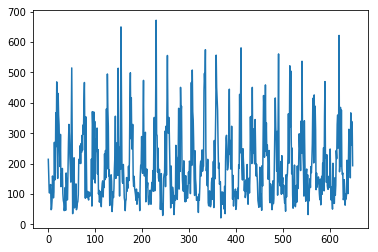

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[22163.348872794006, 18199.539928795995, 17415.529812935758]
(array([448., 451.]), array([ 46., 435.]), array([ -7., 416.]), 367.0)
(array([314., 317.]), array([ 34., 404.]), array([ -8., 413.]), 260.0)
(array([462., 470.]), array([-57., 334.]), array([ -7., 414.]), 339.0)
(array([107., 109.]), array([-14., 382.]), array([ -7., 413.]), 326.0)
(array([0., 0.]), array([ -2., 324.]), array([ -8., 412.]), 193.0)
(0.0, 0.8, 1.0)


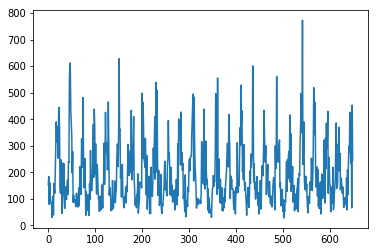

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[34962.92889823, 26838.809609724005, 31318.265536243176]
(array([243., 245.]), array([ 59., 405.]), array([ -8., 390.]), 233.0)
(array([441., 445.]), array([ 54., 377.]), array([ -9., 392.]), 393.0)
(array([148., 150.]), array([-27., 377.]), array([ -8., 389.]), 66.0)
(array([127., 130.]), array([  9., 365.]), array([ -8., 390.]), 453.0)
(array([0., 0.]), array([-26., 390.]), array([ -8., 391.]), 245.0)
(0.0, 0.6, 0.6)


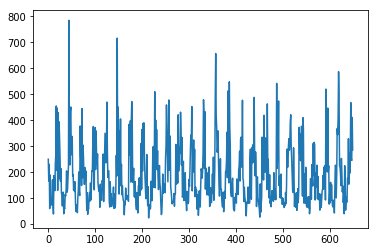

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[33031.68191609201, 21153.83761103, 28681.68833748895]
(array([304., 306.]), array([ 37., 436.]), array([ -2., 438.]), 468.0)
(array([211., 213.]), array([  5., 443.]), array([ -2., 431.]), 253.0)
(array([165., 167.]), array([ 43., 439.]), array([ -3., 432.]), 245.0)
(array([626., 638.]), array([ 23., 408.]), array([ -2., 434.]), 411.0)
(array([0., 0.]), array([ -9., 387.]), array([ -3., 431.]), 286.0)
(0.0, 0.6, 0.8)


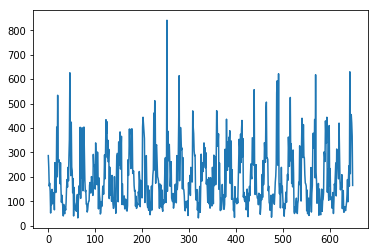

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[70235.926700026, 11659.18095122599, 13403.780472537508]
(array([448., 451.]), array([246., 728.]), array([ 31., 614.]), 381.0)
(array([336., 340.]), array([ 86., 498.]), array([ 31., 607.]), 455.0)
(array([3., 3.]), array([158., 551.]), array([ 29., 613.]), 421.0)
(array([5., 6.]), array([113., 551.]), array([ 30., 614.]), 367.0)
(array([0., 0.]), array([160., 534.]), array([ 30., 613.]), 165.0)
(0.0, 1.0, 1.0)


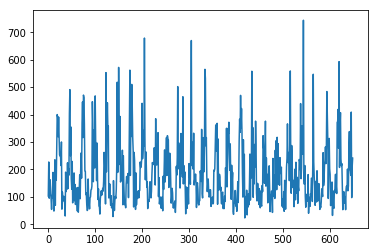

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[21453.815012932006, 21693.201007192005, 20931.420912097637]
(array([168., 169.]), array([-74., 315.]), array([-15., 335.]), 178.0)
(array([336., 339.]), array([-47., 338.]), array([-16., 334.]), 409.0)
(array([25., 26.]), array([-92., 338.]), array([-15., 340.]), 97.0)
(array([402., 412.]), array([-79., 334.]), array([-15., 344.]), 210.0)
(array([0., 0.]), array([-82., 278.]), array([-16., 337.]), 241.0)
(0.0, 0.8, 0.8)


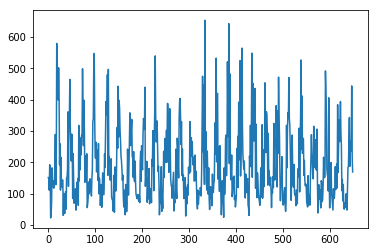

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[142328.00158490008, 8864.256509438, 10219.490014507406]
(array([345., 348.]), array([ 33., 440.]), array([ -4., 479.]), 235.0)
(array([200., 202.]), array([ 85., 443.]), array([ -3., 479.]), 247.0)
(array([1225., 1241.]), array([ 51., 459.]), array([ -3., 480.]), 444.0)
(array([0., 0.]), array([ 74., 436.]), array([ -3., 479.]), 216.0)
(array([0., 0.]), array([  0., 434.]), array([ -4., 479.]), 169.0)
(0.0, 1.0, 1.0)


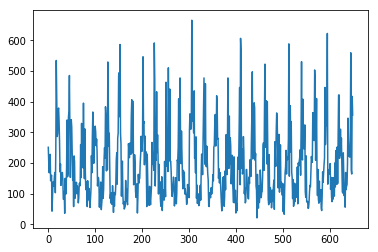

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[69705.98724304602, 87583.065348088, 47090.82806390323]
(array([767., 773.]), array([-109.,  337.]), array([-15., 584.]), 559.0)
(array([16., 16.]), array([-80., 290.]), array([-13., 583.]), 177.0)
(array([243., 246.]), array([-120.,  289.]), array([-13., 587.]), 164.0)
(array([788., 807.]), array([-133.,  227.]), array([-14., 585.]), 417.0)
(array([0., 0.]), array([-106.,  221.]), array([-14., 583.]), 356.0)
(0.0, 0.4, 1.0)


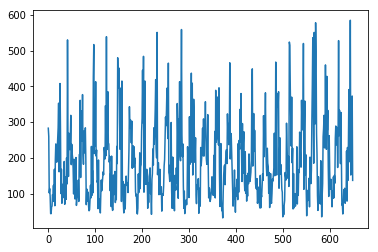

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[26017.564430107992, 54789.599509284, 45947.031377441104]
(array([100., 101.]), array([-81., 280.]), array([-24., 239.]), 152.0)
(array([184., 186.]), array([-108.,  235.]), array([-22., 245.]), 320.0)
(array([43., 44.]), array([-106.,  214.]), array([-23., 248.]), 340.0)
(array([321., 327.]), array([-166.,  207.]), array([-24., 247.]), 373.0)
(array([0., 0.]), array([-150.,  226.]), array([-26., 248.]), 137.0)
(0.0, 0.4, 0.4)


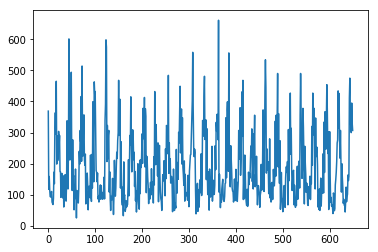

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[90422.26409519001, 3770.8824034540035, 9699.18185332892]
(array([250., 252.]), array([102., 505.]), array([  0., 479.]), 327.0)
(array([362., 365.]), array([143., 492.]), array([ -2., 481.]), 300.0)
(array([876., 890.]), array([133., 416.]), array([ -0., 482.]), 395.0)
(array([0., 0.]), array([ 84., 443.]), array([ -0., 480.]), 331.0)
(array([0., 0.]), array([ 42., 488.]), array([ -1., 483.]), 307.0)
(0.0, 1.0, 1.0)


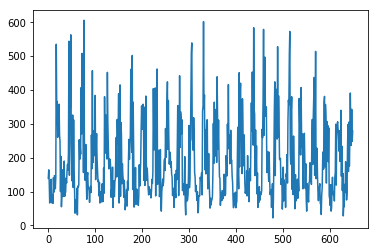

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[64623.037645952, 10201.453960662007, 2017.605643085358]
(array([112., 113.]), array([165., 540.]), array([ 34., 567.]), 284.0)
(array([30., 31.]), array([223., 576.]), array([ 35., 565.]), 236.0)
(array([0., 0.]), array([167., 558.]), array([ 35., 561.]), 343.0)
(array([478., 491.]), array([210., 561.]), array([ 36., 568.]), 248.0)
(array([0., 0.]), array([151., 538.]), array([ 34., 567.]), 279.0)
(0.0, 1.0, 1.0)


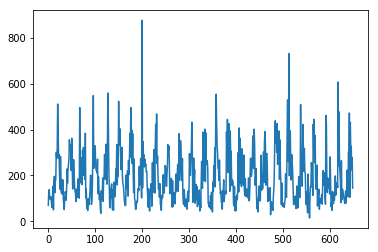

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[308423.9685308361, 19166.201046504, 12222.793583393723]
(array([367., 369.]), array([-69., 330.]), array([ -5., 347.]), 308.0)
(array([254., 256.]), array([-58., 320.]), array([ -5., 355.]), 327.0)
(array([278., 281.]), array([-57., 306.]), array([ -5., 353.]), 224.0)
(array([1488., 1525.]), array([-45., 344.]), array([ -5., 350.]), 278.0)
(array([0., 0.]), array([-83., 304.]), array([ -6., 350.]), 145.0)
(0.0, 0.8, 1.0)


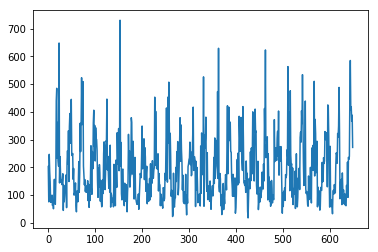

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[63649.069994426, 51086.89653560999, 14281.082592352945]
(array([587., 592.]), array([372., 826.]), array([ 43., 794.]), 406.0)
(array([121., 122.]), array([402., 764.]), array([ 44., 790.]), 418.0)
(array([405., 411.]), array([422., 751.]), array([ 43., 786.]), 366.0)
(array([40., 41.]), array([336., 811.]), array([ 43., 790.]), 388.0)
(array([0., 0.]), array([392., 762.]), array([ 42., 790.]), 272.0)
(0.0, 0.6, 1.0)


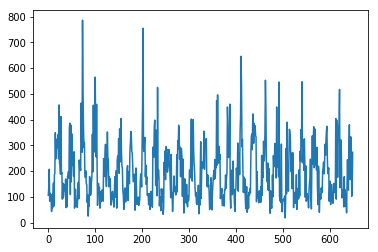

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[22519.79219200201, 12886.186822634, 16192.089226403355]
(array([230., 232.]), array([ 11., 371.]), array([-10., 351.]), 333.0)
(array([368., 372.]), array([ -5., 329.]), array([ -9., 349.]), 293.0)
(array([193., 196.]), array([-25., 346.]), array([-10., 351.]), 102.0)
(array([0., 0.]), array([-52., 347.]), array([-10., 353.]), 115.0)
(array([0., 0.]), array([-38., 308.]), array([ -9., 352.]), 273.0)
(0.0, 1.0, 1.0)


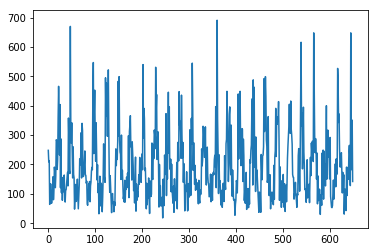

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[20731.027050291996, 61418.842983578004, 53429.883036926374]
(array([652., 656.]), array([-15., 342.]), array([-12., 512.]), 648.0)
(array([183., 185.]), array([-17., 328.]), array([-12., 511.]), 182.0)
(array([105., 106.]), array([-53., 295.]), array([-11., 516.]), 323.0)
(array([159., 163.]), array([-74., 314.]), array([-11., 516.]), 351.0)
(array([0., 0.]), array([-60., 352.]), array([-12., 512.]), 142.0)
(0.0, 0.4, 0.8)


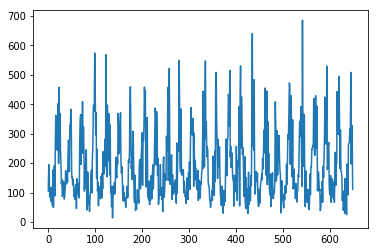

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[100390.06418134003, 16017.997943570002, 22757.515820024735]
(array([277., 279.]), array([ 91., 470.]), array([ -1., 480.]), 508.0)
(array([55., 55.]), array([ 85., 458.]), array([ -0., 481.]), 197.0)
(array([235., 238.]), array([ 76., 504.]), array([ -0., 481.]), 329.0)
(array([936., 961.]), array([ 95., 455.]), array([ -0., 481.]), 310.0)
(array([0., 0.]), array([ 49., 393.]), array([  0., 478.]), 111.0)
(0.0, 0.8, 0.8)


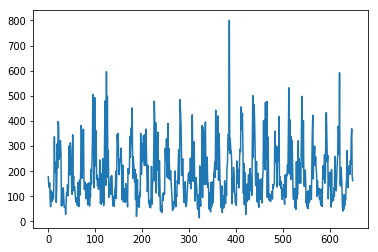

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[16894.195145228005, 6953.339250480001, 12627.49039842179]
(array([61., 61.]), array([ 50., 428.]), array([ -6., 429.]), 228.0)
(array([404., 407.]), array([ 19., 464.]), array([ -6., 430.]), 335.0)
(array([506., 513.]), array([ 38., 408.]), array([ -6., 426.]), 369.0)
(array([110., 112.]), array([-12., 362.]), array([ -6., 427.]), 185.0)
(array([0., 0.]), array([ 28., 375.]), array([ -6., 425.]), 162.0)
(0.0, 1.0, 1.0)


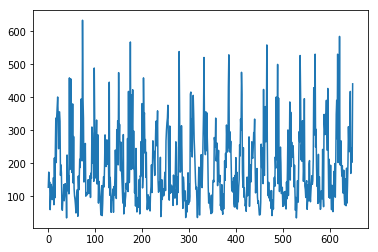

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
[50475.658829873995, 18250.311166476, 9460.646512559699]
(array([225., 227.]), array([176., 605.]), array([  2., 529.]), 169.0)
(array([53., 54.]), array([160., 540.]), array([  2., 530.]), 245.0)
(array([143., 145.]), array([152., 504.]), array([  1., 531.]), 203.0)
(array([82., 83.]), array([ 78., 457.]), array([  1., 524.]), 203.0)
(array([0., 0.]), array([ 69., 445.]), array([  3., 533.]), 441.0)
(0.0, 0.8, 1.0)


In [19]:
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
variance_level_results = []
import sys
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_error

import os
D=26
rmse_vec_cv = []
#with suppress_stdout():
rmse_vec = []
sim_data_var = []
N_SIM = 100
sim_results_pi = []
sim_results_mse = []
for sim_num in np.arange(100):
            sim_n_t_d,sim_var = sim_data(D,10,False)
            sim_data_var.append(sim_var)
            train = sim_n_t_d
            


            train = np.array(train)
            train_n_t_d = train.reshape((-1,D))
            ts = train_n_t_d.sum(axis=1)
            data_to_be_scaled_down  = train_n_t_d[len(ts)-D:]




            delayed_data = []
            count = D
            for i in range(len(data_to_be_scaled_down)):
                tmp = data_to_be_scaled_down[i][:count].tolist()
                while len(tmp) <D:
                    tmp.append(0)
                delayed_data.append(tmp)
                count -=1 


            training_data = np.append(train_n_t_d[:len(ts)-D],delayed_data,axis=0)

            k = np.array(train_n_t_d).shape[1 ]
            alphas = np.ones(k)

            for i in range(len(ts)-D):
                alphas += train_n_t_d[i]

            
           
            #######
            # MODEL 1: Delay
            ########
            delay_model_samples = []
            for s_ in range(N_SIM):
                model_1_delay = []
                count = D
                p_vec_noise = np.random.dirichlet(alphas)
                for i in range(len(delayed_data)):
                    delay_forecast = np.sum(delayed_data[i])/np.sum(p_vec_noise[:count])
                    model_1_delay.append(np.round(delay_forecast,2))
                    count -= 1
                delay_model_samples.append(model_1_delay)
            
            delay_model_samples = np.array(delay_model_samples)
            

            #######
            # MODEL 2 : Forecast
            ########
            
            LO=5
            process_training_data = np.append(ts[:len(ts)-D],model_1_delay[:D-LO],axis=0)
            from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
            myDLM = dlm(process_training_data)
           # myDLM = myDLM + seasonality(26, name='7day', w=1.0)
            myDLM = myDLM + autoReg(degree=2, data=process_training_data, name='ar2', w=1.0)
            myDLM.fit()
            (process_model_forecast, predictVar) = myDLM.predictN(N=LO, date=myDLM.n-1)
            
            #######
            # MODEL 2
            ########
            forecast_model_samples = []
            for s_ in range(N_SIM):
                model_2_delay = []
                count = D
                for i in np.arange(LO,0,-1):
                    tmp = np.random.normal(process_model_forecast[LO-i],np.sqrt(predictVar[LO-i]))
                    model_2_delay.append(np.round(tmp,2))
                    count -= 1

                forecast_model_samples.append(np.append(model_1_delay[:D-LO],model_2_delay))
            
            forecast_model_samples = np.array(forecast_model_samples)
            
                
            model_average = bayes_estimate_prob(np.sum(delayed_data,axis=1),forecast_model_samples,alphas,LO,N_SIM)
            
            model_average = np.transpose(np.array(model_average).reshape((-1,LO)))
            delay_model_samples = np.transpose(np.array(delay_model_samples))
            forecast_model_samples = np.transpose(np.array(forecast_model_samples))
            
            delay_sim_res = delay_model_samples
            fcast_sim_res = forecast_model_samples
            avg_sim_res = model_average
            LO_av = avg_sim_res
            LO_delay = delay_sim_res[D-LO:]
            LO_fcast = fcast_sim_res[D-LO:]
            LO_truth = ts[len(ts)-LO:]
            
            sim_results_mse.append([mean_squared_error(np.mean(LO_delay,axis=1),LO_truth),\
                                   mean_squared_error(np.mean(LO_fcast,axis=1),LO_truth),\
                                   mean_squared_error(np.mean(LO_av,axis=1),LO_truth)])
            print (sim_results_mse[-1])
            av_cp = 0
            fcast_cp = 0
            delay_cp = 0
            for i in range(LO):
                LO_av_ci = np.round(np.percentile(LO_av[i],[2.5,97.5]))
                LO_fcast_ci = np.round(np.percentile(LO_fcast[i],[2.5,97.5]))
                LO_delay_ci = np.round(np.percentile(LO_delay[i],[2.5,97.5]))
                print (LO_delay_ci,LO_fcast_ci,LO_av_ci, LO_truth[i])
                if LO_av_ci[0] <= LO_truth[i] <= LO_av_ci[1]:
                    av_cp +=1

                if LO_fcast_ci[0] <= LO_truth[i] <= LO_fcast_ci[1]:
                    fcast_cp +=1

                if LO_delay_ci[0] <= LO_truth[i] <= LO_delay_ci[1]:
                    delay_cp +=1


            av_cp = 1.*av_cp/LO
            fcast_cp = 1.*fcast_cp/LO
            delay_cp = 1.*delay_cp/LO

            print (delay_cp,fcast_cp,av_cp)
            sim_results_pi.append([delay_cp,fcast_cp,av_cp])
    


        

In [20]:
sim_results_pi = np.array(sim_results_pi)
print np.mean(sim_results_pi,axis=0)

sim_results_mse = np.array(sim_results_mse)
print np.round(np.mean(sim_results_mse,axis=0)/1000)


[0.006 0.8   0.908]
[316.  23.  20.]
